In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:,[3,4]] 

In [48]:
# Standardize the features.
# In Affinity Propagation (and many clustering algorithms), the model uses a distance-based similarity metric (typically Euclidean distance) to decide which points are similar or close together.
# so applied scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

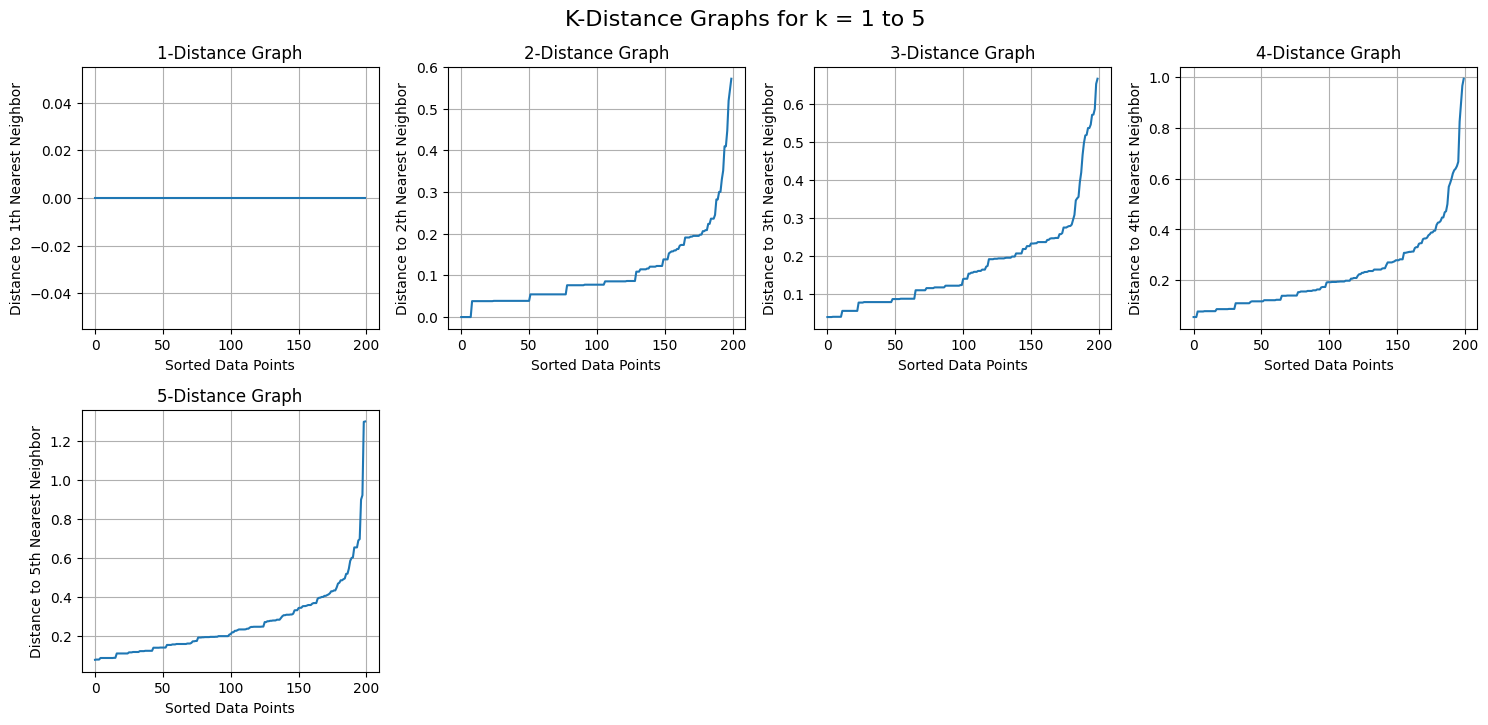

In [77]:
# now to find the ideal eps value , Plot k-distance graphs for k = 1 to 5(sample taken from 1 to 5)
plt.figure(figsize=(15, 10))

for k in range(1, 6):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_scaled)
    distances, indices = neighbors_fit.kneighbors(X_scaled)
    k_distances = np.sort(distances[:, k-1])  # kth nearest neighbor distances
    
    plt.subplot(3, 4, k)
    plt.plot(k_distances)
    plt.title(f"{k}-Distance Graph")
    plt.xlabel("Sorted Data Points")
    plt.ylabel(f"Distance to {k}th Nearest Neighbor")
    plt.grid(True)

plt.tight_layout() #Adjust the padding between and around subplots.
plt.suptitle("K-Distance Graphs for k = 1 to 5", fontsize=16, y=1.02)
plt.show()

In [90]:
#from the above diagrams the ideal eps value lies between 0.2 and 0.3. so we can take 0.25
#generally for a 2D data (like Annual Income and Spending Score), the minsamples must be 2*no of features .. so 2*2=4.. min_samples is 4
#For high-dimensional data, min_samples should be higher.

In [88]:
clustering = DBSCAN(eps=0.25, min_samples=4).fit(X_scaled)

In [89]:
clustering.labels_

array([-1,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0, -1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1,  3, -1,  3,  3, -1,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4, -1, -1,  6,  4, -1, -1,
        6, -1,  6,  4,  6,  4,  6, -1,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#-1  label value is assigned to noise or outliers — data points that: Do not belong to any cluster

In [92]:
supervised = pd.DataFrame(dataset)
supervised['cluster_group']=clustering.labels_

C:\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


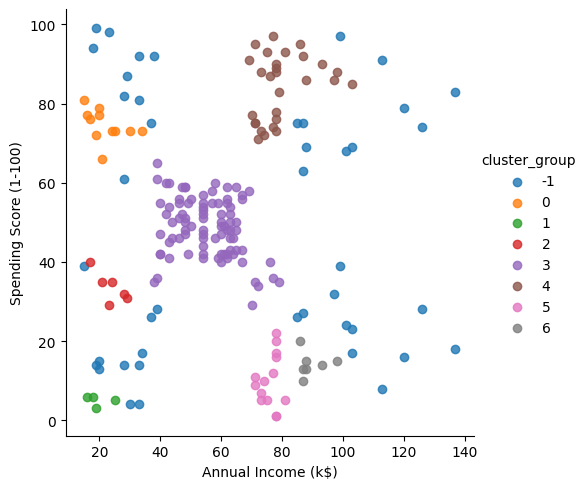

In [93]:
import seaborn as sns
facet = sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)

In [94]:
#to remove the noise ie -1, filter ther supervised data containing -1 and then apply the graph

In [107]:
# Remove rows where cluster_group is -1 (noise)
filtered_df = supervised[supervised['cluster_group'] != -1]


C:\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


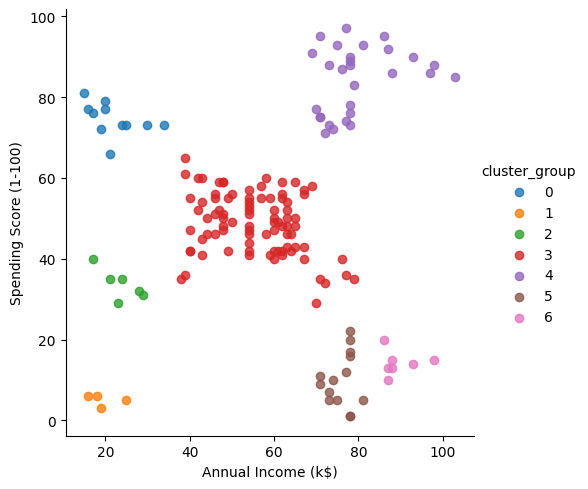

In [109]:
import seaborn as sns
facet = sns.lmplot(data=filtered_df,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)